In [31]:
# Import pandas for data manipulation
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Import seaborn for enhanced data visualization
import seaborn as sns

# Import ttest_ind and shapiro from scipy.stats for statistical tests
from scipy.stats import ttest_ind, shapiro


In [3]:
#Use code snippets from Google Colab to upload a file from the local device. I uploaded a file with the column 'CAPACITY' (PLEASE CHECK PDF FOR CLARIFICATION)

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving shelter_data_with_capacity.csv to shelter_data_with_capacity.csv
User uploaded file "shelter_data_with_capacity.csv" with length 8982786 bytes


In [ ]:
# Create data frame

#I named my csv file "shelter_data_with_capacity.csv"
assignment1_data = "shelter_data_with_capacity.csv"
shelter_data= pd.read_csv(assignment1_data)
shelter_data

# Data Cleaning

In [ ]:
# Correct datetime format for the 'OCCUPANCY_DATE' column
shelter_data['OCCUPANCY_DATE'] = pd.to_datetime(shelter_data['OCCUPANCY_DATE'])

# Remove duplicate entries
shelter_data.drop_duplicates(inplace=True)

# Impute missing values in columns with small missing counts
small_missing_columns = ['PROGRAM_NAME', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']
for col in small_missing_columns:
    mode_value = shelter_data[col].mode()[0]
    shelter_data[col].fillna(mode_value, inplace=True)

print(shelter_data)

# Exploratory Data Analysis


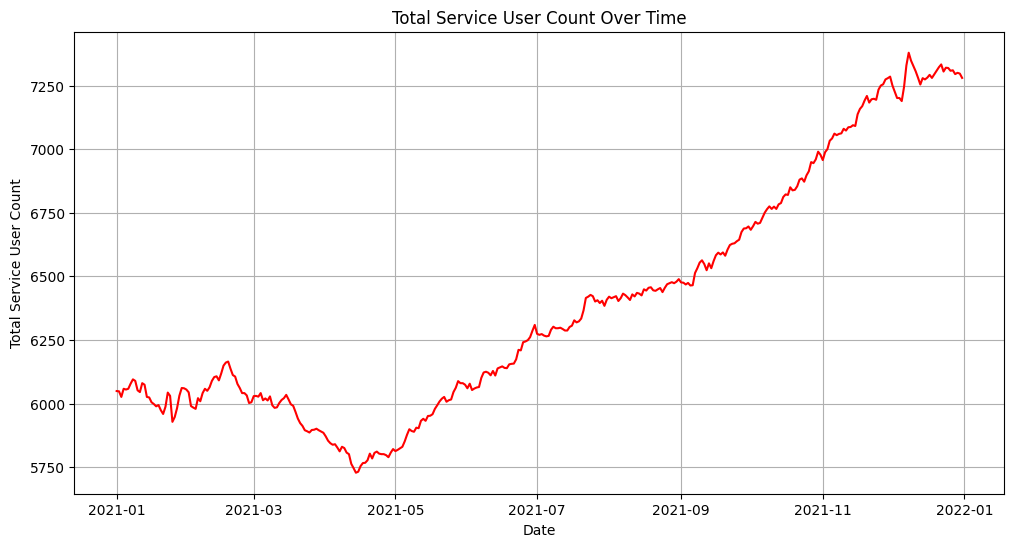

In [7]:
# Time Series Plot for Service User Count over time

plt.figure(figsize=(12, 6))
plt.plot(shelter_data.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].sum(), color='red')
plt.title('Total Service User Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Service User Count')
plt.grid(True)
plt.show()


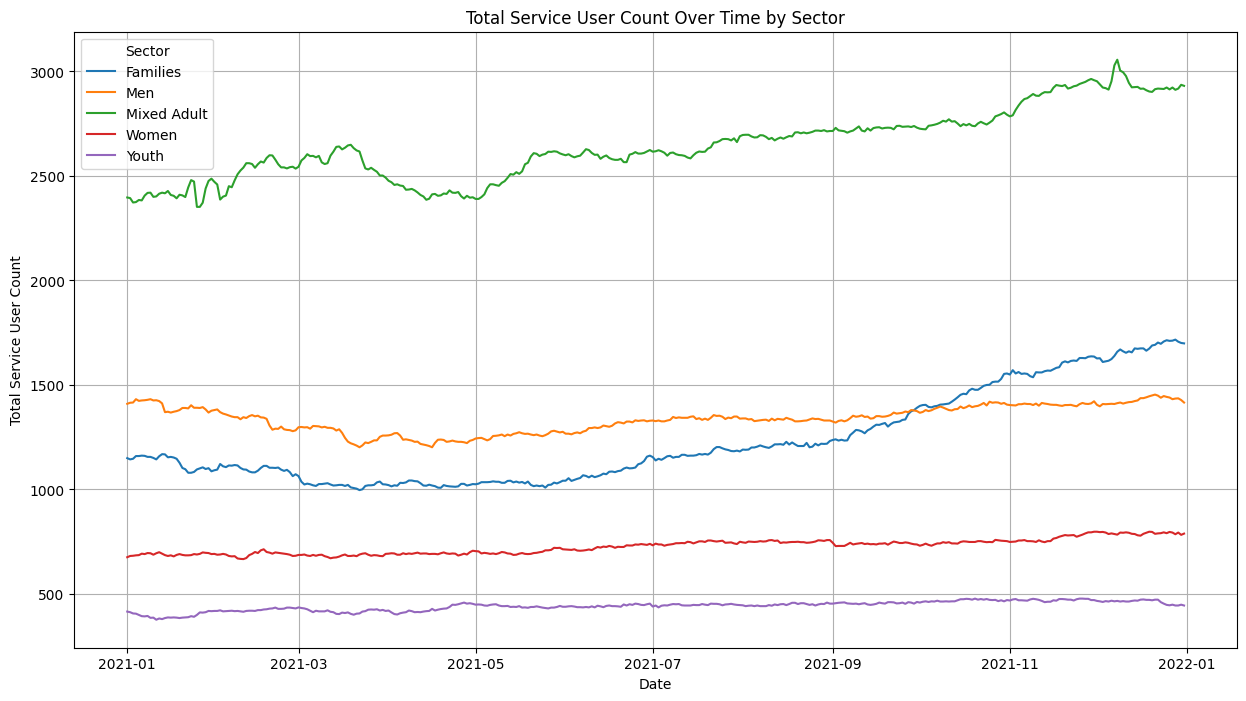

In [8]:
# Line Plot for Total Service Users by Sector Over Time

# Ensure 'OCCUPANCY_DATE' is in datetime
shelter_data['OCCUPANCY_DATE'] = pd.to_datetime(shelter_data['OCCUPANCY_DATE'])

# Group the data by 'OCCUPANCY_DATE' and 'SECTOR', then sum the service user counts
service_user_counts_by_date_and_sector = shelter_data.groupby(['OCCUPANCY_DATE', 'SECTOR'])['SERVICE_USER_COUNT'].sum().unstack()

# Time Series Plot for Service User Count over time for each sector
plt.figure(figsize=(15, 8))
for sector in service_user_counts_by_date_and_sector.columns:
    plt.plot(service_user_counts_by_date_and_sector.index, service_user_counts_by_date_and_sector[sector], label=sector)

plt.title('Total Service User Count Over Time by Sector')
plt.xlabel('Date')
plt.ylabel('Total Service User Count')
plt.legend(title='Sector')
plt.grid(True)
plt.show()


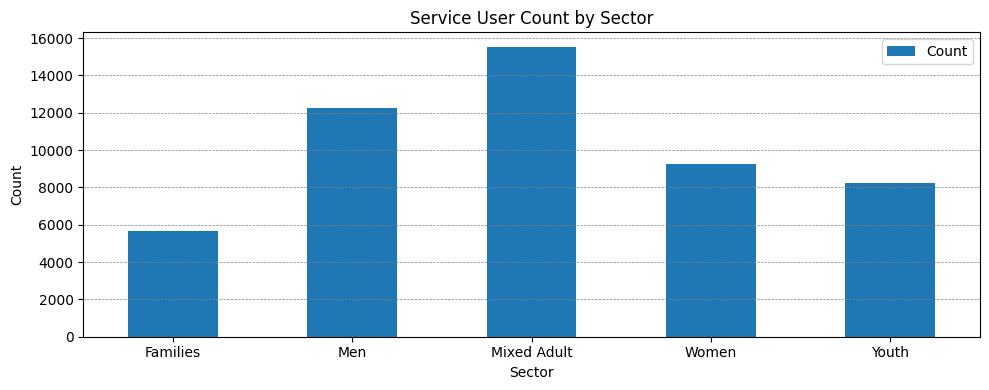

In [32]:
# Plot Service User Count By Sector

# Grouping data by 'SECTOR' and counting service user entries
sector_counts = shelter_data.groupby('SECTOR').size()

# Since we're focusing on SECTOR alone, we create a DataFrame with counts for a bar chart (not stacked)
sector_counts_df = sector_counts.reset_index(name='Count')

# Plotting the bar chart
sector_counts_df.plot(kind='bar', x='SECTOR', y='Count', stacked=True, figsize=(10, 4))
plt.title('Service User Count by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Adjust rotation as needed

# Making sure the layout is tight so everything fits nicely
plt.tight_layout()

# Adding a grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.show()

In [29]:
# Count the number of times 'Families' appears under the 'SECTOR' column.
families_count = (shelter_data['SECTOR'] == 'Families').sum()

print(f"There are {families_count} entries for families under the SECTOR column.")


There are 5649 entries for families under the SECTOR column.


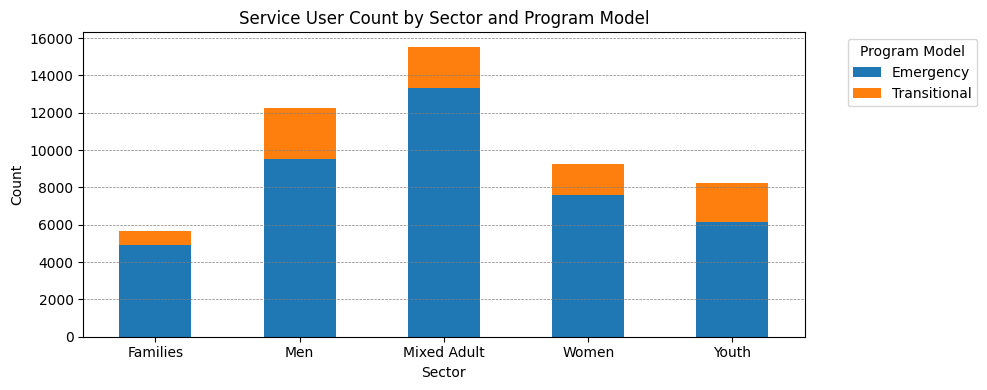

In [10]:
# Display Service User Count by Sector and Program Model

# Create a stacked bar chart
stacked_data = shelter_data.groupby(['SECTOR', 'PROGRAM_MODEL']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Service User Count by Sector and Program Model')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.legend(title='Program Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
# Add a grid to the plot for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')



Emergency Capacity Normality Test: ShapiroResult(statistic=0.48218250274658203, pvalue=0.0)
Transitional Capacity Normality Test: ShapiroResult(statistic=0.9313963651657104, pvalue=8.823953320312485e-18)


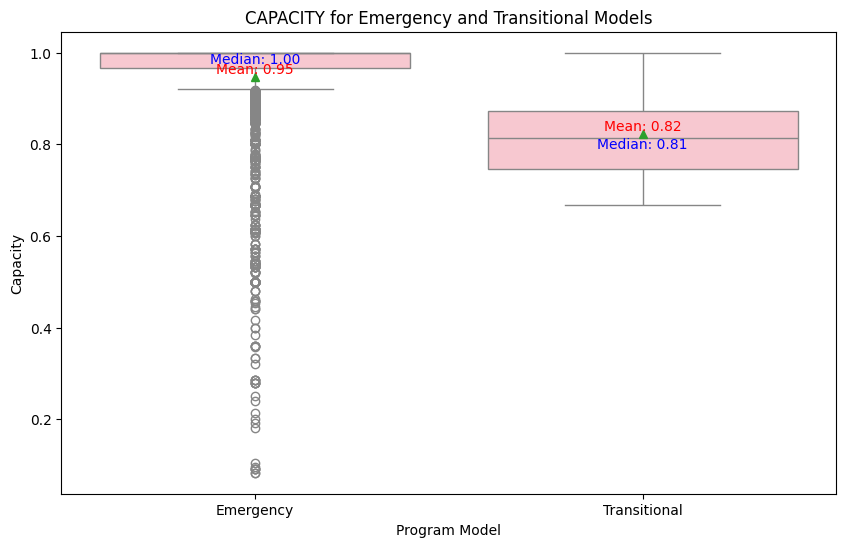

Welch's t-test Statistic: 32.0056
P-value: 0.0000


In [34]:
# Create Box Plots to Compare Emergency and Transitional Models for families and conduct t tests

# Filter the dataset for the 'Families' sector
families_data = shelter_data[shelter_data['SECTOR'] == 'Families']

# Extract capacity rates for 'Emergency' and 'Transitional' program models within the 'Families' sector
emergency_capacity = families_data[families_data['PROGRAM_MODEL'] == 'Emergency']['CAPACITY'].dropna()
transitional_capacity = families_data[families_data['PROGRAM_MODEL'] == 'Transitional']['CAPACITY'].dropna()

# Perform Shapiro-Wilk test for normality on the capacity rates of both program models
emergency_normality = shapiro(emergency_capacity)
transitional_normality = shapiro(transitional_capacity)

# Output the normality test results
print(f"Emergency Capacity Normality Test: {emergency_normality}")
print(f"Transitional Capacity Normality Test: {transitional_normality}")

# Create the box plot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=families_data, x='PROGRAM_MODEL', y='CAPACITY', showmeans=True, color="pink")

# Calculate means and medians for annotation
means = families_data.groupby('PROGRAM_MODEL')['CAPACITY'].mean()
medians = families_data.groupby('PROGRAM_MODEL')['CAPACITY'].median()

# Annotate means and medians on the plot
for i, model in enumerate(['Emergency', 'Transitional']):
    mean = means[model]
    median = medians[model]
    plt.text(i, mean, f'Mean: {mean:.2f}', ha='center', va='bottom', color='red')
    plt.text(i, median, f'Median: {median:.2f}', ha='center', va='top', color='blue')

plt.title('CAPACITY for Emergency and Transitional Models')
plt.xlabel('Program Model')
plt.ylabel('Capacity')
plt.show()

# Perform Welch's t-test to compare the capacity rates of 'Emergency' and 'Transitional' program models
t_stat, p_value = ttest_ind(emergency_capacity, transitional_capacity, equal_var=False)

# Output the t-test results
print(f"Welch's t-test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


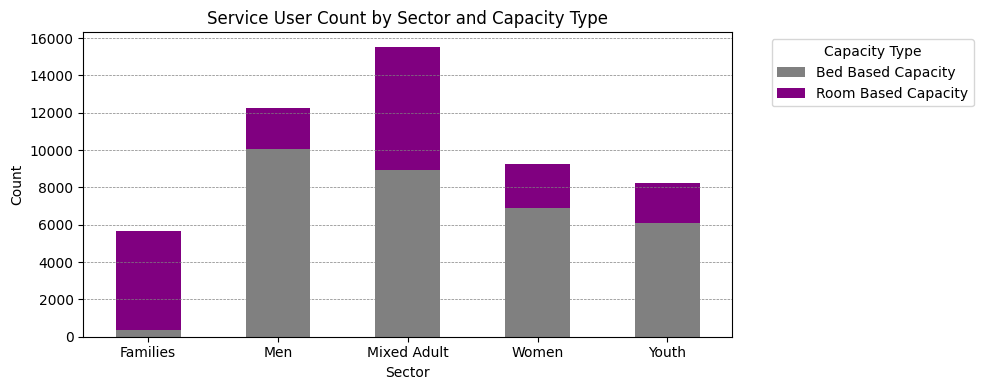

In [28]:
#Display Service User Count by Sector and Capacity Type

stacked_data = shelter_data.groupby(['SECTOR', 'CAPACITY_TYPE']).size().unstack(fill_value=0)

# Define a list of colors for the stacks
colors = ['grey', 'purple']

# Plotting the stacked bar chart with custom colors
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 4), color=colors)
plt.title('Service User Count by Sector and Capacity Type')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.legend(title='Capacity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
# Add a grid to the plot for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.show()
